## Housing price prediction

A web service for predicting housing prices on city districts using regression and to deploy the service publicly (for example, on Heroku). The service offer an endpoint that takes as input certain statistics of the district (defined below), and outputs the estimated price of a dwelling.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy import arange,array,ones,linalg
import sys
sys.path.append('flask-app')
from calc_dev import calc_dev


In [3]:
testparam = pd.DataFrame({
  "property_tax_rate": [330.0],
  "avg_number_of_rooms": [0.1],
  "crime_rate": [4.0],
  "distance_to_employment_centers": [6.5],
  "pupil_teacher_ratio": [19.5]
})

## Dataset

The pricing data for training a model is provided as a CSV formatted
file. 

The columns are as follows:

- crime_rate: per capita crime rate in the district
- avg_number_of_rooms: average number of rooms per dwelling
- distance_to_employment_centers: weighted distances to employment centres in the city
- property_tax_rate: full-value property-tax rate per USD 10,000
- pupil_teacher_ratio: pupil-teacher ratio in the district
- house_value: Median value of owner-occupied homes in $1000's



In [4]:
Housing=pd.read_csv('housing.csv')
features = ['crime_rate', 'avg_number_of_rooms','distance_to_employment_centers', 'property_tax_rate','pupil_teacher_ratio']

y = Housing['house_value']


In [5]:
Housing['house_value'].describe()

count    505.000000
mean      22.529901
std        9.205991
min        5.000000
25%       17.000000
50%       21.200000
75%       25.000000
max       50.000000
Name: house_value, dtype: float64

In [6]:
y = Housing['house_value']
X = Housing[features]

# Test case using random selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=324)



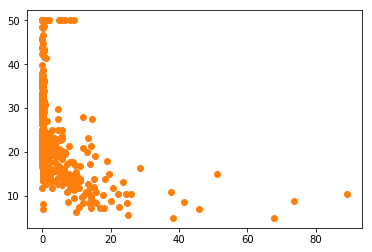

In [21]:
plt.scatter(X['crime_rate'], y)
plt.show()

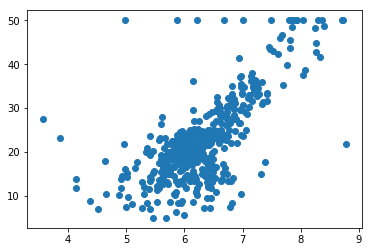

In [22]:
plt.scatter(X['avg_number_of_rooms'], y)
plt.show()

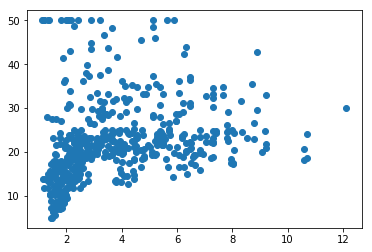

In [23]:
plt.scatter(X['distance_to_employment_centers'], y)
plt.show()

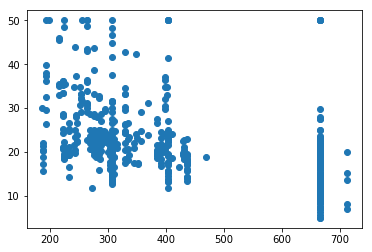

In [24]:
plt.scatter(X['property_tax_rate'], y)
plt.show()

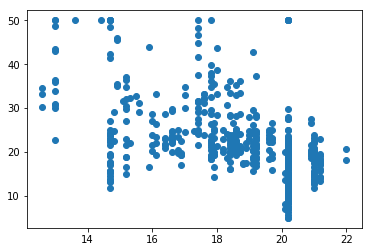

In [25]:
plt.scatter(X['pupil_teacher_ratio'], y)
plt.show()

Linear regression calculation

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)
# checking the model
pd.Series(y_prediction).describe(), y_test.describe()

(count    152.000000
 mean      23.088326
 std        7.130807
 min       -2.292278
 25%       18.891306
 50%       22.701893
 75%       26.705582
 max       45.649920
 dtype: float64, count    152.000000
 mean      22.861842
 std        8.855357
 min        5.000000
 25%       17.475000
 50%       21.800000
 75%       26.525000
 max       50.000000
 Name: house_value, dtype: float64)

Mean Squared Error calculation

In [8]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

5.848798872243093


In [9]:
# Parameters used
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

Function to calculate Standard Deviation based on #num nearest data points

Testing prediction and deviation calculation

In [10]:
x1 = X.iloc[0:1]
res = regressor.predict(x1)
stddev = calc_dev(x1, 10)
print(res, stddev)

[ 25.84960469] 8.86384040169196


Manages WS requests and responses.

The web service has a single HTTP POST endpoint /predict. The endpoint accepts a JSON object specifying values for the input variables.

Example request (the server is running on port 5000 on localhost):

curl http://localhost:5000/predict -H application/json --data-binary '{
  "crime_rate": 0.1,
  "avg_number_of_rooms": 4.0,
  "distance_to_employment_centers": 6.5,
  "property_tax_rate": 330.0,
  "pupil_teacher_ratio": 19.5
}'


## Saving the Model using Pickle

In [ ]:
import pickle

with open('reg_model.pkl', 'wb') as fid:
    pickle.dump(regressor, fid,2) 

In [ ]:
#Save a y-values for deviation

#Save the index_dict into disk
with open('y_values.pkl', 'wb') as fid:
    pickle.dump(y, fid,2)  